<a href="https://colab.research.google.com/github/Anoop-mishra63/ML/blob/master/Lab/Exp12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
!wget -O AirQualityUCI.zip https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
!unzip AirQualityUCI.zip
df = pd.read_excel('/content/AirQualityUCI.xlsx', parse_dates=[['Date', 'Time']])
df.replace(to_replace=-200.0, value=0.0, inplace=True)
wv = df['NMHC(GT)']
bad_wv = wv == -200.0
wv[bad_wv] = 0.0

--2020-11-01 15:45:40--  https://archive.ics.uci.edu/ml/machine-learning-databases/00360/AirQualityUCI.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1543989 (1.5M) [application/x-httpd-php]
Saving to: ‘AirQualityUCI.zip’

AirQualityUCI.zip   100%[===================>]   1.47M  3.08MB/s    in 0.5s    

2020-11-01 15:45:41 (3.08 MB/s) - ‘AirQualityUCI.zip’ saved [1543989/1543989]

Archive:  AirQualityUCI.zip
  inflating: AirQualityUCI.csv       
  inflating: AirQualityUCI.xlsx      


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


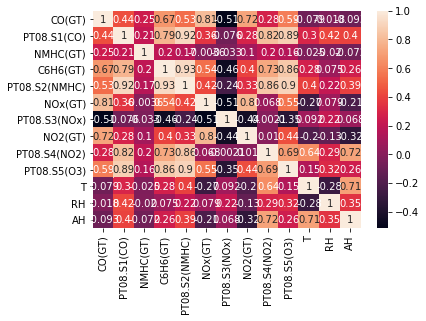

In [3]:
sns.heatmap(df.corr(), annot=True)

In [4]:
target = 'NO2(GT)'

In [5]:
df = df[['CO(GT)','PT08.S1(CO)','C6H6(GT)','PT08.S2(NMHC)','NOx(GT)'	,'PT08.S3(NOx)','NO2(GT)','PT08.S4(NO2)','PT08.S5(O3)','T','RH']]

In [6]:
X = df.drop(target,axis=1)
y = df[[target]]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y)
value = y_test

In [8]:
print (x_train.shape)
print (x_test.shape)
print (y_train.shape)
print (y_test.shape)

(7017, 10)
(2340, 10)
(7017, 1)
(2340, 1)


In [9]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train = scaler.fit_transform(x_train)
scaler.fit(x_test)
x_test = scaler.fit_transform(x_test)
scaler.fit(y_train)
y_train = scaler.fit_transform(y_train)
scaler.fit(y_test)
y_test = scaler.fit_transform(y_test)

In [10]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print (x_train.shape)
print (x_test.shape)

(7017, 10, 1)
(2340, 10, 1)


In [11]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.layers import Flatten
def RNN_MODEL():
    # have to convert to 3D for feeding the data
    regressor = Sequential()
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50,return_sequences = True))
    regressor.add(Dropout(0.2))
    regressor.add(LSTM(units = 50))
    regressor.add(Dropout(0.2))
    regressor.add(Dense(units = 1))
    regressor.compile(optimizer = 'adam',loss = 'mean_squared_error',metrics=['accuracy'])
    return regressor
regressor = RNN_MODEL()
regressor.fit(x_train,y_train,epochs = 100)

Epoch 1/100
220/220 [==============================] - 2s 7ms/step - loss: 0.0273 - accuracy: 0.1759
Epoch 2/100
220/220 [==============================] - 1s 7ms/step - loss: 0.0183 - accuracy: 0.1754
Epoch 3/100
220/220 [==============================] - 2s 7ms/step - loss: 0.0155 - accuracy: 0.1753
Epoch 4/100
220/220 [==============================] - 1s 7ms/step - loss: 0.0141 - accuracy: 0.1756
Epoch 5/100
220/220 [==============================] - 1s 7ms/step - loss: 0.0137 - accuracy: 0.1756
Epoch 6/100
220/220 [==============================] - 1s 7ms/step - loss: 0.0130 - accuracy: 0.1759
Epoch 7/100
220/220 [==============================] - 1s 7ms/step - loss: 0.0119 - accuracy: 0.1760
Epoch 8/100
220/220 [==============================] - 1s 7ms/step - loss: 0.0110 - accuracy: 0.1760
Epoch 9/100
220/220 [==============================] - 2s 7ms/step - loss: 0.0096 - accuracy: 0.1759
Epoch 10/100
220/220 [==============================] - 2s 7ms/step - loss: 0.0088 - accura

In [12]:
regressor.evaluate(x_test,y_test)
y_pred = regressor.predict(x_test)
real_output = []
for item in y_pred:
    real_output.append((item[0]))

74/74 [==============================] - 0s 3ms/step - loss: 0.0028 - accuracy: 0.1744


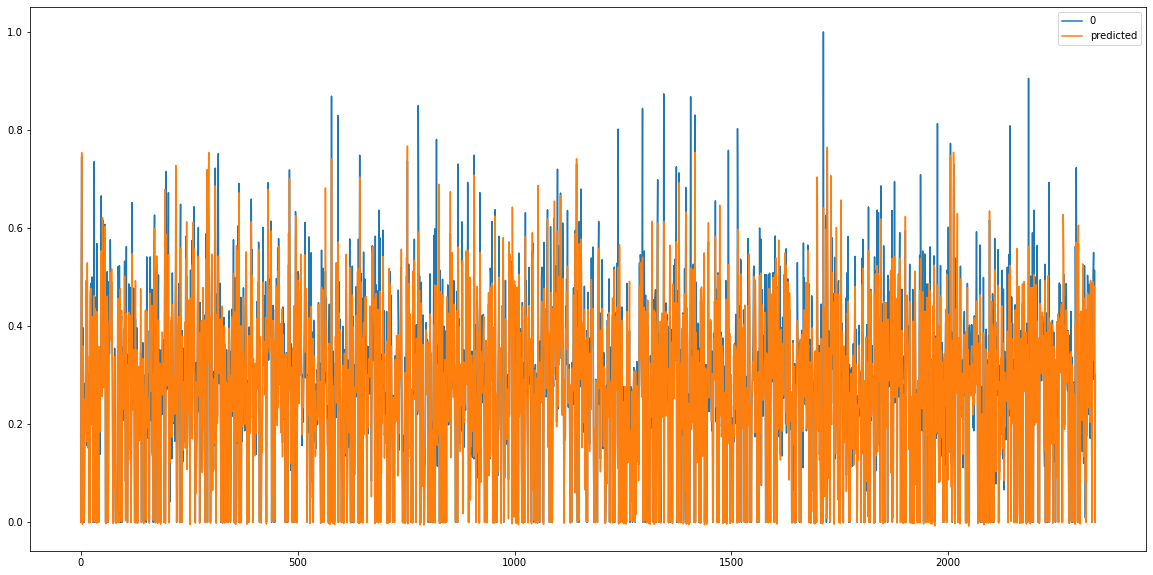

In [13]:
value = pd.DataFrame(y_test)
value['predicted'] = np.array(real_output)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20,10)
value.plot()